In [1]:
import pandas as pd
import numpy as np

In [36]:
X_train = pd.read_csv("./Datasets/X_train.csv", index_col=[0], header=[0, 1, 2])
y_train = pd.read_csv("./Datasets/Y_train.csv", index_col=[0], header=[0])
X_valid = pd.read_csv("./Datasets/X_valid.csv", index_col=[0], header=[0, 1, 2])
y_valid = pd.read_csv("./Datasets/Y_valid.csv", index_col=[0], header=[0])
X_test = pd.read_csv("./Datasets/X_test.csv", index_col=[0], header=[0, 1, 2])

y_train = np.array(y_train).reshape(-1)
y_valid = np.array(y_valid).reshape(-1)

In [6]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(16760, 7488)
(2394, 7488)
(16760,)
(2394,)


In [7]:
print(sum(y_train)/len(y_train))
print(sum(y_valid)/len(y_valid))

0.07309069212410502
0.06349206349206349


In [8]:
scale_pos_weight = 1/(sum(y_train)/len(y_train))
scale_pos_weight

13.681632653061223

In [103]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Phase 1: only L2-regularization

# Round 1 Cross Validation(CV)
# param_grid = {
#     "max_depth": [3,4,5],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "gamma": [0.1,0.25,1],
#     "reg_lambda": [0,10,50],
#     "scale_pos_weight": [11,12,13,14]
# }
# Best params: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 50, 'scale_pos_weight': 11}

# Round 2 CV
# param_grid = {
#     "max_depth": [4],
#     "learning_rate": [0.1,0.2,0.5],
#     "gamma": [1,2,10],
#     "reg_lambda": [50,70,100],
#     "scale_pos_weight": [8,9,10,11]
# }
# Best params: {'gamma': 1, 'learning_rate': 0.2, 'max_depth': 4, 'reg_lambda': 50, 'scale_pos_weight': 9}
# score on kaggle: 

# Phase 2: l1-regularization

# Round 1 CV
# param_grid = {
#     "max_depth": [3,4,5],
#     "learning_rate": [0.1,0.2,1],
#     "gamma": [0.1,0.2,1],
#     "alpha": [50,70,100],
#     "scale_pos_weight": [11,12,13]
# }
# Best params: {'alpha': 50, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'scale_pos_weight': 11}

# Round 2 CV
# param_grid = {
#     "max_depth": [5,6,7],
#     "learning_rate": [0.2,0.4,0.6],
#     "gamma": [0.2,0.4,0.6],
#     "alpha": [50],
#     "scale_pos_weight": [9,10,11]
# }
# Best params: {'alpha': 50, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'scale_pos_weight': 9}

# Round 3 CV
param_grid = {
    "max_depth": [7,8,9],
    "learning_rate": [0.2,0.4,0.6],
    "gamma": [0.2,0.4,0.6],
    "alpha": [50],
    "scale_pos_weight": [9,10,11]
}



# Phase 3: both L1 and L2 regularization

# Round 1 CV
# param_grid = {
#     "max_depth": [3,4,5],
#     "learning_rate": [0.1,0.2,0.5],
#     "gamma": [0.2,0.5,1],
#     "lambda": [20,50,70],
#     "alpha": [20,50,70],
#     "scale_pos_weight": [12,13,14]
# }
# Best params: {'alpha': 70, 'gamma': 0.5, 'lambda': 20, 'learning_rate': 0.2, 'max_depth': 4, 'scale_pos_weight': 12}

# Round 2 CV
# param_grid = {
#     "max_depth": [4],
#     "learning_rate": [0.2],
#     "gamma": [0.5],
#     "lambda": [0,10,20],
#     "alpha": [70,100,200],
#     "scale_pos_weight": [10,11,12]
# }
# Best params: {'alpha': 70, 'gamma': 0.5, 'lambda': 20, 'learning_rate': 0.2, 'max_depth': 4, 'scale_pos_weight': 12}

opt_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective="binary:logistic", tree_method="gpu_hist", eval_metric="auc", use_label_encoder=False, seed=3612,subsample=0.9,colsample_bytree=0.5),
    param_grid=param_grid,
    scoring="f1_weighted",
    verbose=0,
    n_jobs=10,
    cv=5
)
opt_params.fit(X_train, y_train)

/userhome/cs2/cahu/anaconda3/envs/stat3612/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/userhome/cs2/cahu/anaconda3/envs/stat3612/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/userhome/cs2/cahu/anaconda3/envs/stat3612/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_sco

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [104]:
print(opt_params.best_score_)
print(opt_params.best_params_)

0.9175397583483514
{'alpha': 50, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'scale_pos_weight': 9}


In [93]:
# {'gamma': 1, 'learning_rate': 0.2, 'max_depth': 4, 'reg_lambda': 50, 'scale_pos_weight': 1}

clf = xgb.XGBClassifier(objective="binary:logistic",
                        tree_method="gpu_hist", 
                        eval_metric="auc", 
                        use_label_encoder=False, 
                        gamma=1, 
                        learning_rate=0.2, 
                        max_depth=4,
                        reg_lambda=50,
                        scale_pos_weight=10, 
                        seed=3612)
clf.fit(X_train, y_train, verbose=0, eval_set=[(X_valid, y_valid)])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=1, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=3612,
              reg_alpha=0, reg_lambda=50, scale_pos_weight=10, seed=3612,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, ...)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2149
           1       0.64      0.40      0.49       245

    accuracy                           0.92      2394
   macro avg       0.79      0.69      0.72      2394
weighted avg       0.90      0.92      0.91      2394



/userhome/cs2/cahu/anaconda3/envs/stat3612/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


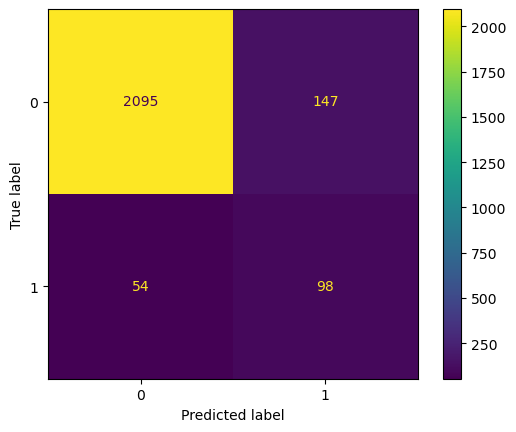

In [94]:
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = clf.predict(X_valid)
print(classification_report(y_pred, y_valid))
plot_confusion_matrix(clf, X_valid, y_valid)

# Final model

In [38]:
y_train = pd.read_csv("./Datasets/Y_train.csv", index_col=[0], header=[0])
y_valid = pd.read_csv("./Datasets/Y_valid.csv", index_col=[0], header=[0])

In [39]:
X_final = pd.concat([X_train, X_valid])
y_final = pd.concat([y_train, y_valid])

In [95]:
clf_final = xgb.XGBClassifier(objective="binary:logistic",
                        tree_method="gpu_hist", 
                        eval_metric="auc", 
                        use_label_encoder=False, 
                        gamma=1, 
                        learning_rate=0.2, 
                        max_depth=4,
                        reg_lambda=50,
                        scale_pos_weight=10, 
                        seed=3612)
clf_final.fit(X_final, y_final, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=1, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=3612,
              reg_alpha=0, reg_lambda=50, scale_pos_weight=10, seed=3612,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, ...)

In [98]:
y_prob = clf_final.predict_proba(X_test)
y_prob_pred = list()

for prob in y_prob:
    y_prob_pred.append(prob[1])

y_out = pd.DataFrame(data=X_test.index,columns=["Id"])
y_out["Predicted"]=y_prob_pred
y_out.head()

In [100]:
y_out.to_csv("Y_test.csv", index=False)